###Introduction to Artificial Intelligence - Coursework

###Question 1

###Dataset Overview

The dataset consists of data collected from three different species of penguins – Adélie, Chinstrap, and Gentoo – that are found on three islands in the Palmer Archipelago, Antarctica. The data was collected from a study conducted between 2007 and 2009 by Dr. Kristen Gorman with the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

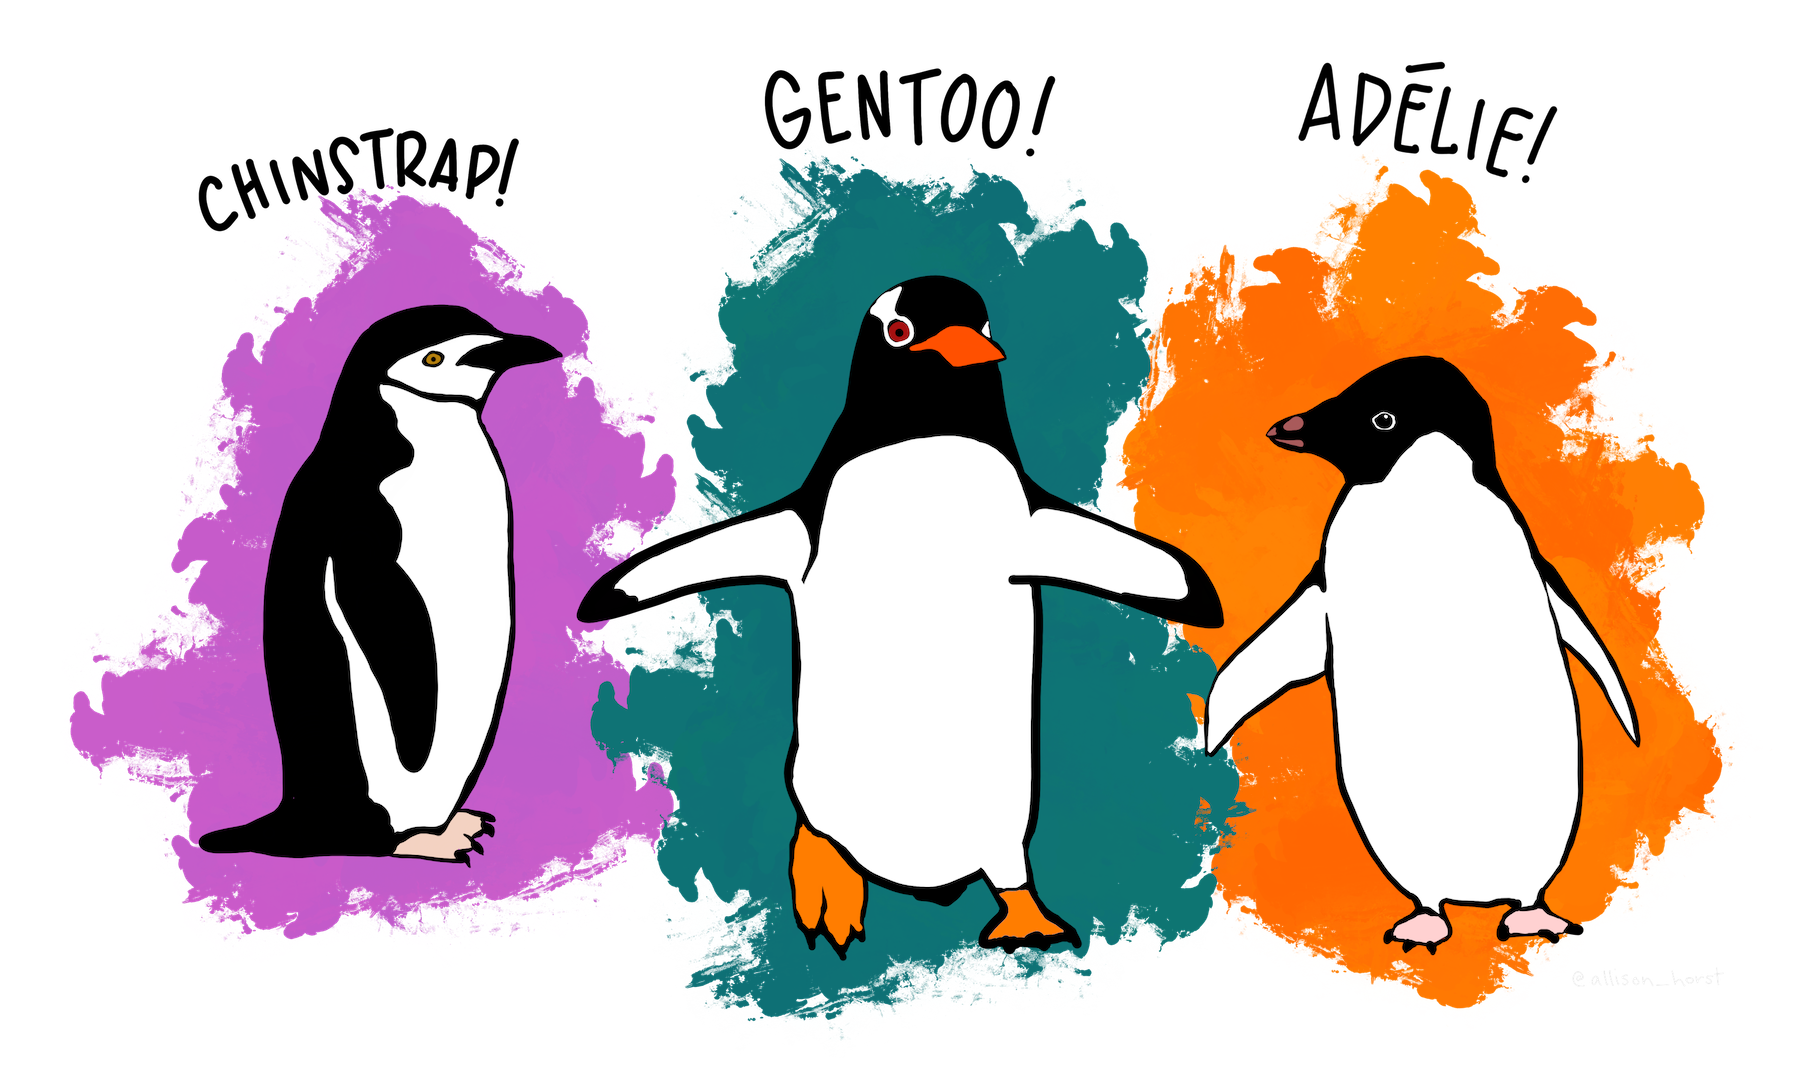

###Data Composition
The Palmer Penguins dataset includes the following key features for each penguin:

Species: The species of penguin (Adélie, Chinstrap, and Gentoo).
Island: The name of the island in the Palmer Archipelago, Antarctica, where the penguin was observed (Biscoe, Dream, or Torgersen).
Bill Length (mm): The length of the dorsal ridge of the penguin's bill.
Bill Depth (mm): The depth of the penguin bill, measured from top to bottom.
Flipper Length (mm): The length of the penguin's flipper, measured from the shoulder to the tip.
Body Mass (g): The body mass of the penguin.
Sex: The sex of the penguin (male or female).



###IMPORTING LIBRARY

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sn
from numpy import log, e
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV


###LOADING DATASET

In [9]:
!pwd
!ls

/content
drive  sample_data


In [13]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd ..
# %cd /content/drive/MyDrive
# from google.colab import files
# uploaded = files.upload()
# print("dataset loaded")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/
/content/drive/MyDrive


dataset loaded




###Penguin Dataset Overview (penguin.csv)

In [15]:
%cd /content/drive/MyDrive
#Reading the dataset
df_peng=pd.read_csv('penguins.csv')


/content/drive/MyDrive


In [16]:
#Printing the first 10 rows of the penguin dataset using .head
print("First 10 rows of the penguin datset:")
df_peng.head(11) #prints first 10 rows of the datset

First 10 rows of the penguin datset:


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [17]:
#Printing the shape of the dataset
shape = df_peng.shape #saves the shape of the dataset in variable shape
print("Shape of the dataset:")
print(shape) #prints the shape

Shape of the dataset:
(344, 9)


In [18]:
#Printing the names of the columns of the dataset
columns=df_peng.columns #saves the column names of the dataset in variable  columns
print("Printing coloumn names  of the dataset:")
print(columns ) #prints the names of columns

Printing coloumn names  of the dataset:
Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [19]:
#Value count of each species
df_peng['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [20]:
#Printing the statistics of the penguin dataset
print("Printing statstics of the penguin dataset:")
df_peng.describe(include='all') #describes the mean, std, etc.. for the dataset

Printing statstics of the penguin dataset:


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [21]:
#checking unique values in the columns
print(df_peng['species'].unique())
print(df_peng['island'].unique())
print(df_peng['sex'].unique())
print(df_peng['year'].unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female' nan]
[2007 2008 2009]


In [22]:
#Printing the datatypes of various columns
types=df_peng.dtypes #saves the datatypes of the dataset in variable types
print("Printing datatypes of each coloums in the dataset:")
print(types)  #prints the different datatypes n of columns

Printing datatypes of each coloums in the dataset:
rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


###Pre-Processing the Dataset

In [23]:
#checking for null values in the dataset
null=df_peng.isnull().sum(axis=0)
print(null)#prints the number of null values in the dataset


rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [24]:
# drop unused columns
df_peng = df_peng.drop(columns=['rowid'])
df_peng.dropna(inplace=True)

In [25]:
df_peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [26]:
#replacing all null values with averages in that colums
df_peng["bill_length_mm"] = df_peng["bill_length_mm"].fillna(df_peng["bill_length_mm"].mean())
df_peng["bill_depth_mm"] = df_peng["bill_depth_mm"].fillna(df_peng["bill_depth_mm"].mean())
df_peng["flipper_length_mm"] = df_peng["flipper_length_mm"].fillna(df_peng["flipper_length_mm"].mean())
df_peng["body_mass_g"] = df_peng["body_mass_g"].fillna(df_peng["body_mass_g"].mean())

In [27]:
#checking again for null values
df_peng =df_peng.dropna(axis = 0, how = 'any')
df_peng.isnull().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [28]:
# Converting categorical features
df_peng['species'] = df_peng['species'].astype('category')
df_peng['island'] = df_peng['island'].astype('category')
df_peng['sex'] = df_peng['sex'].astype('category')
df_peng['year'] = df_peng['year'].astype('category')


In [30]:
# #checking dataset after conversion
# df_peng.info()

### Scaling and Normalization of Data

In [31]:
# normalizing the dataset using min max scaling function

df_normalized_peng = df_peng.copy()

for col in df_normalized_peng.columns:
    if df_normalized_peng[col].dtypes == float:
        df_normalized_peng[col] = (df_normalized_peng[col] - df_normalized_peng[col].min()) / (df_normalized_peng[col].max() - df_normalized_peng[col].min())

In [33]:
# df_normalized_peng.describe()

###One Hot Encoding


In [37]:
# Assuming df_normalized_peng is your DataFrame that has already been normalized and now you want to encode it
data_encoded = pd.get_dummies(df_normalized_peng, columns=['species', 'island', 'sex', 'year'])

# Explicitly converting boolean columns to integers if necessary
data_encoded = data_encoded * 1

# Display the first few rows of the newly encoded dataframe
print(data_encoded.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0.254545       0.666667           0.152542     0.291667   
1        0.269091       0.511905           0.237288     0.305556   
2        0.298182       0.583333           0.389831     0.152778   
4        0.167273       0.738095           0.355932     0.208333   
5        0.261818       0.892857           0.305085     0.263889   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0               1                  0               0              0   
1               1                  0               0              0   
2               1                  0               0              0   
4               1                  0               0              0   
5               1                  0               0              0   

   island_Dream  island_Torgersen  sex_female  sex_male  year_2007  year_2008  \
0             0                 1           0         1          1          0   
1 

###Dataset Vizualization

<Axes: xlabel='count', ylabel='species'>

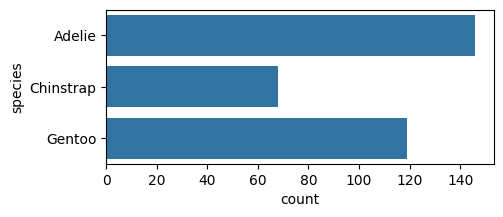

In [38]:
#bar plot for count of different species of penguins
fig=plt.figure(figsize=(5,2)) #size of the figure
sn.countplot(df_normalized_peng['species']) #counts the total value and plots

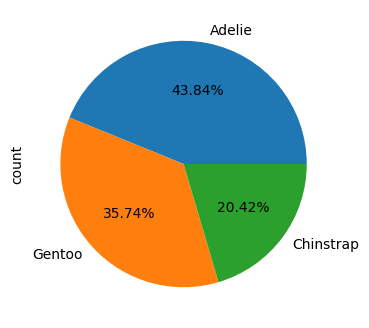

In [39]:
#Plotting a pie graph to show the distribution of penguin count across the different island
fig = plt.figure(figsize=(5, 4))  # size of the figure
df_normalized_peng['species'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

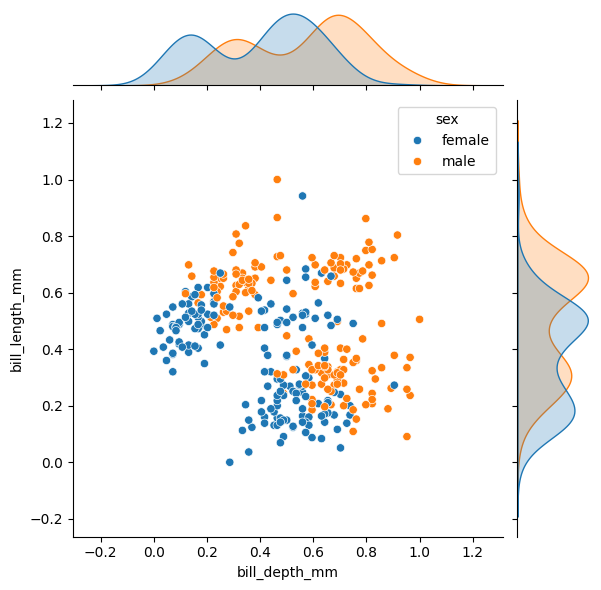

In [40]:
#scatter plot for bill depth vs bill lenth  for hue sex
sn.jointplot(data = df_normalized_peng, x = "bill_depth_mm", y = "bill_length_mm", hue = "sex")
plt.show()

<Figure size 500x400 with 0 Axes>

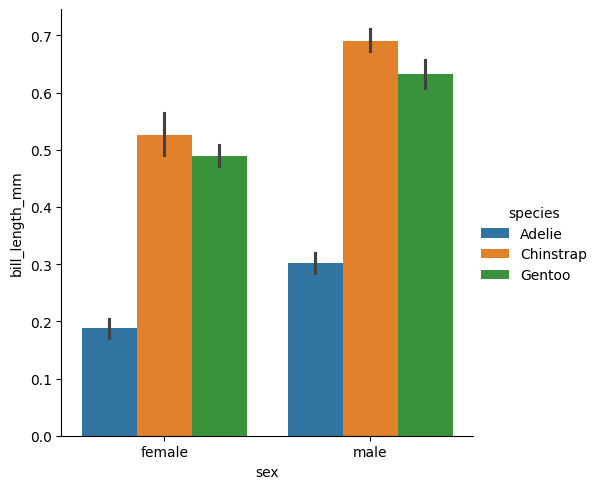

In [41]:
#bar plot for sex vs bill lenth for different species
fig=plt.figure(figsize=(5,4)) #size of the figure
sn.catplot(data = df_normalized_peng, x="sex", y="bill_length_mm", hue="species", kind="bar")
plt.show()

<Figure size 500x400 with 0 Axes>

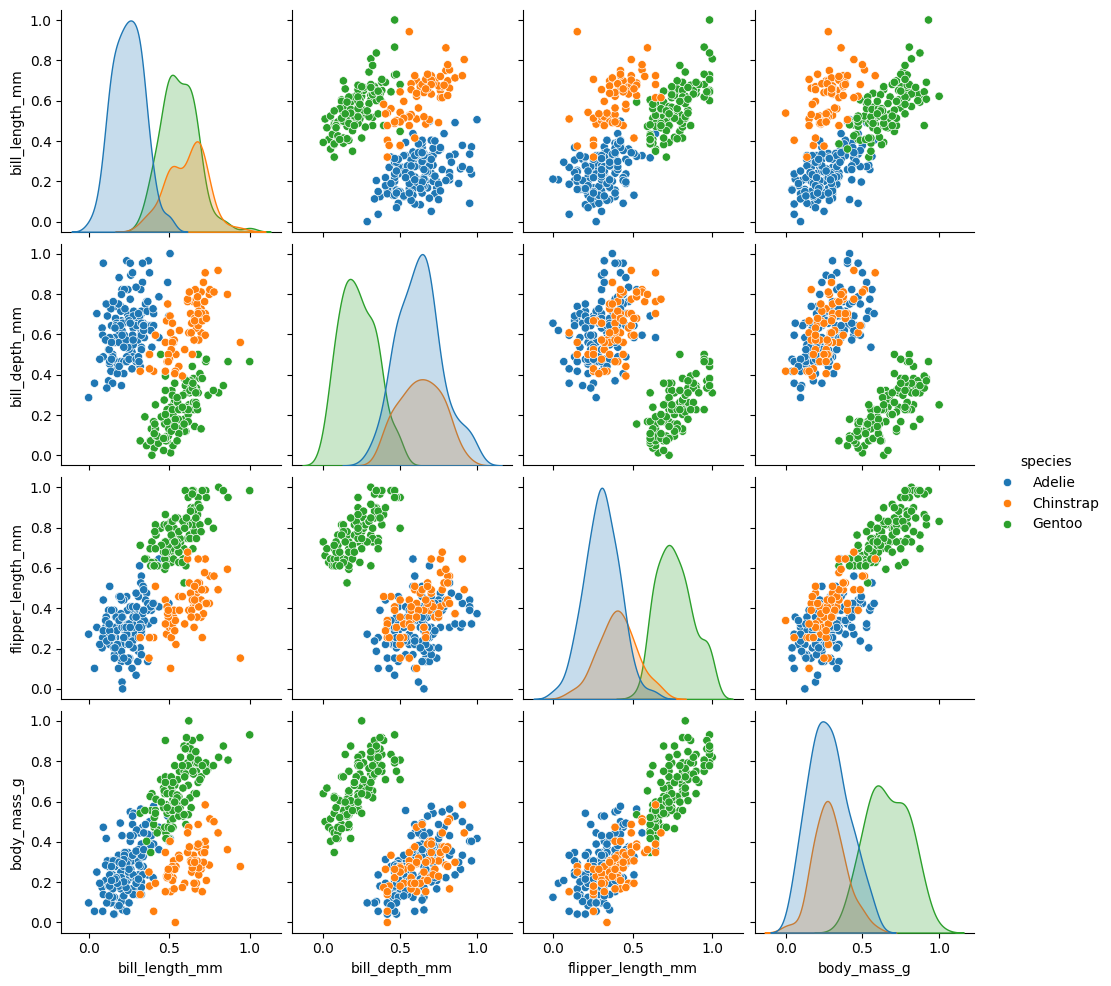

In [42]:
#Scatterplot Matrix
fig=plt.figure(figsize=(5,4))
sn.pairplot(data =df_normalized_peng, hue = "species")
plt.show()

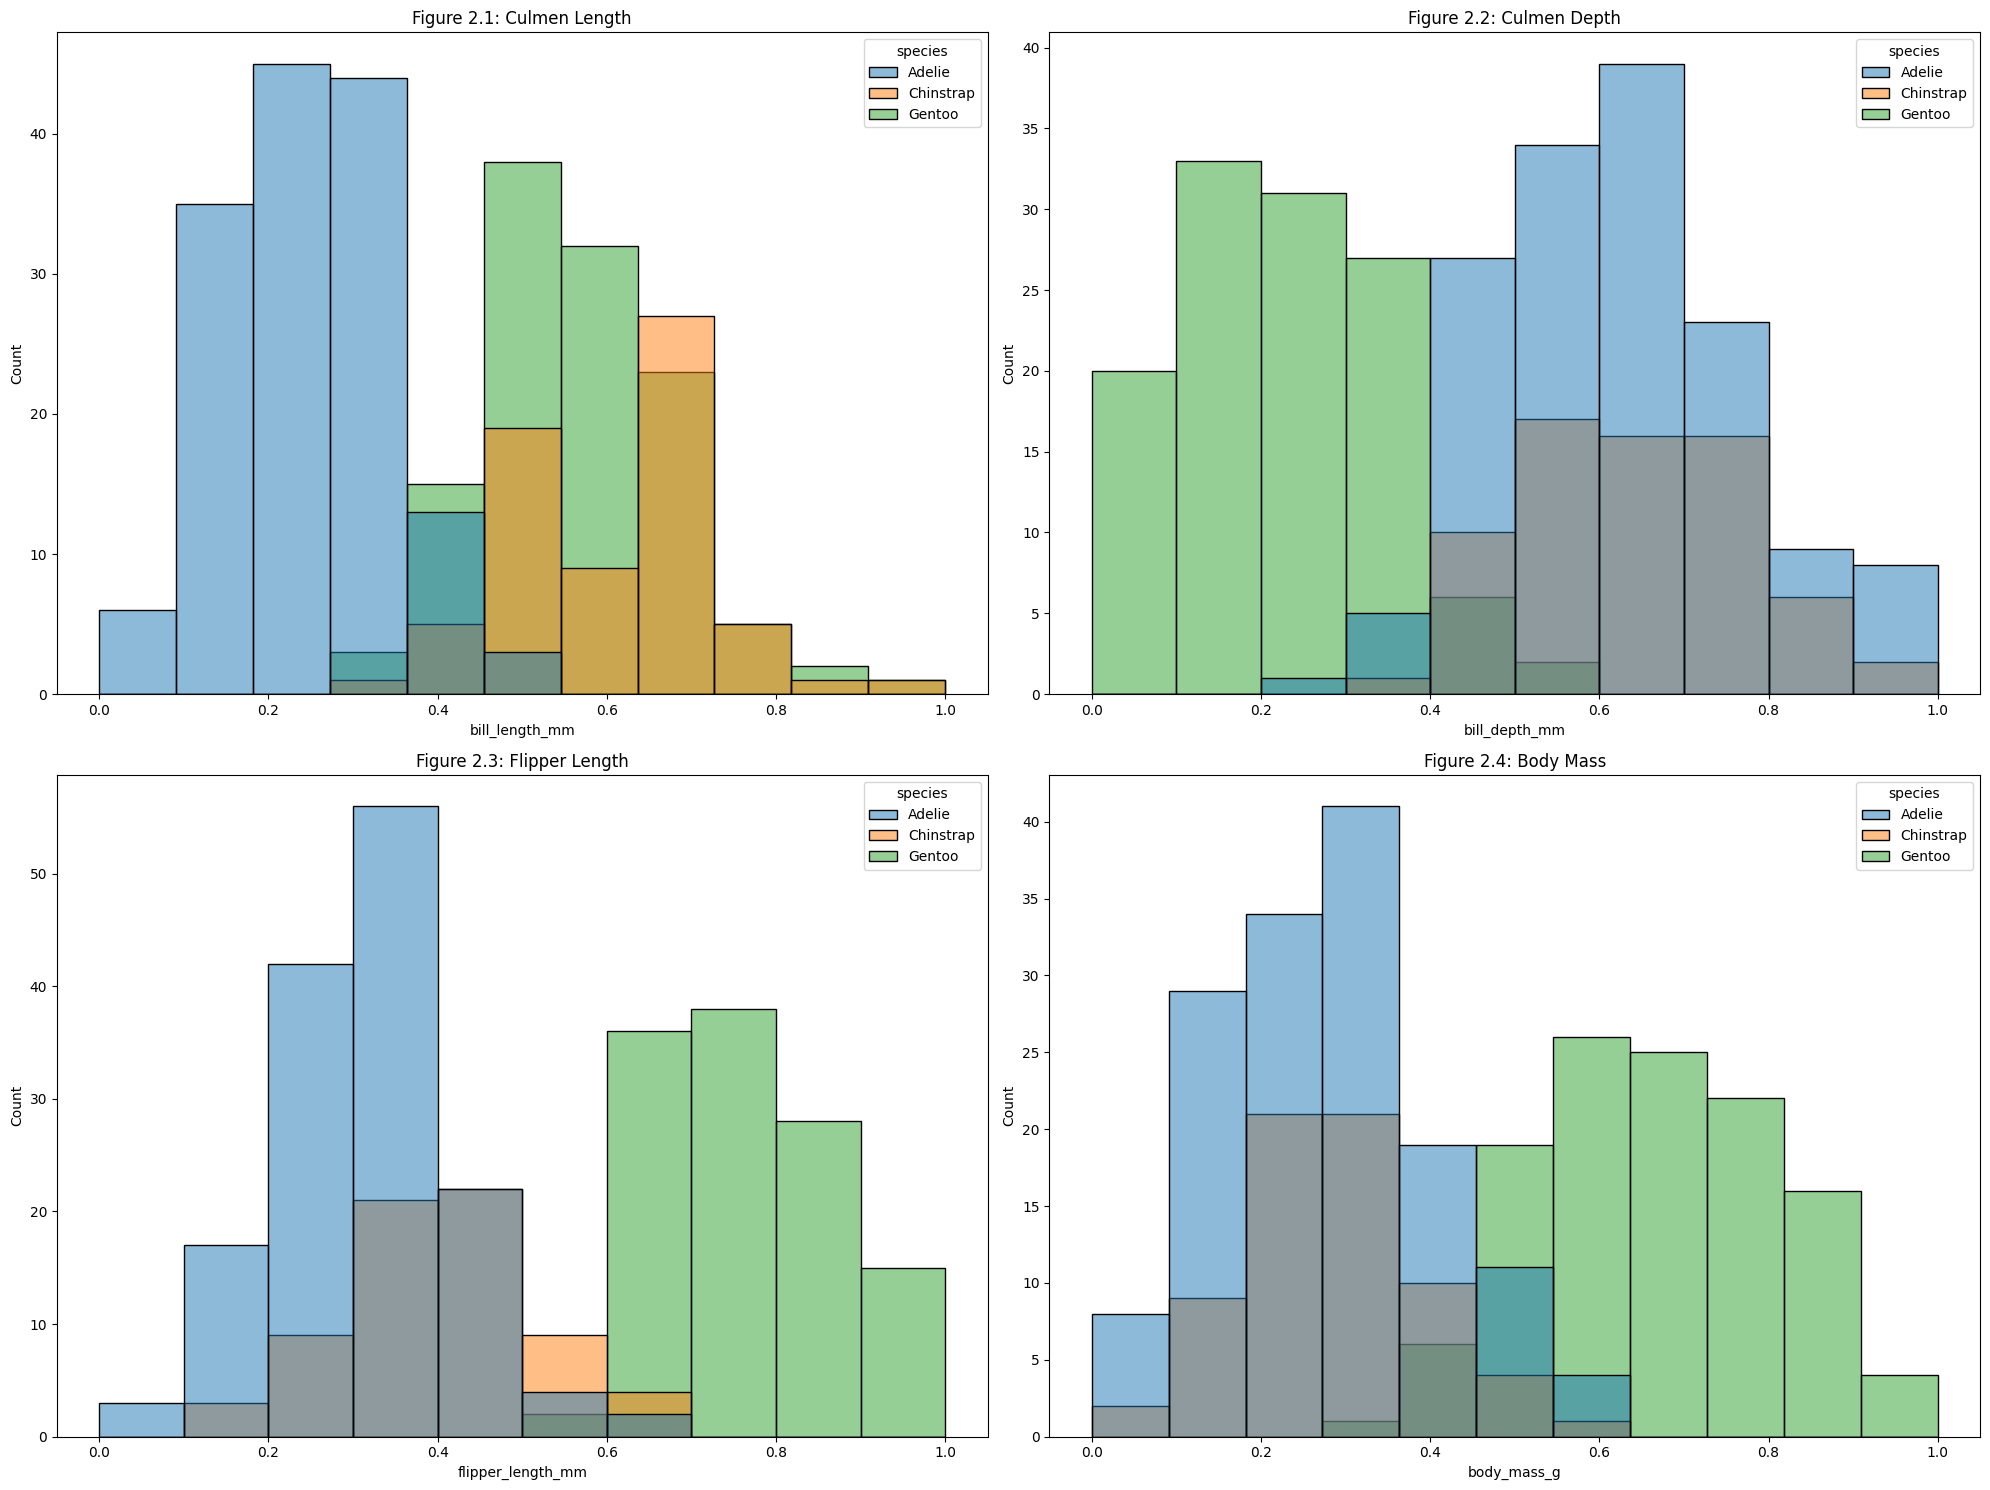

In [43]:
#histogram
fig, ax = plt.subplots(2, 2)  # Adjusted to 2 rows and 2 columns
fig.set_figwidth(20)  # You might want to adjust this and the height to fit your display
fig.set_figheight(15)  # Adjust the height to accommodate 2x2 plots

# Plotting histograms for each measurement, colored by species
sns.histplot(df_normalized_peng, ax=ax[0, 0], x="bill_length_mm", hue="species").set_title("Figure 2.1: Culmen Length")
sns.histplot(df_normalized_peng, ax=ax[0, 1], x="bill_depth_mm", hue="species").set_title("Figure 2.2: Culmen Depth")
sns.histplot(df_normalized_peng, ax=ax[1, 0], x="flipper_length_mm", hue="species").set_title("Figure 2.3: Flipper Length")
sns.histplot(df_normalized_peng, ax=ax[1, 1], x="body_mass_g", hue="species").set_title("Figure 2.4: Body Mass")

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area.
plt.show()  # Display the plots



                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


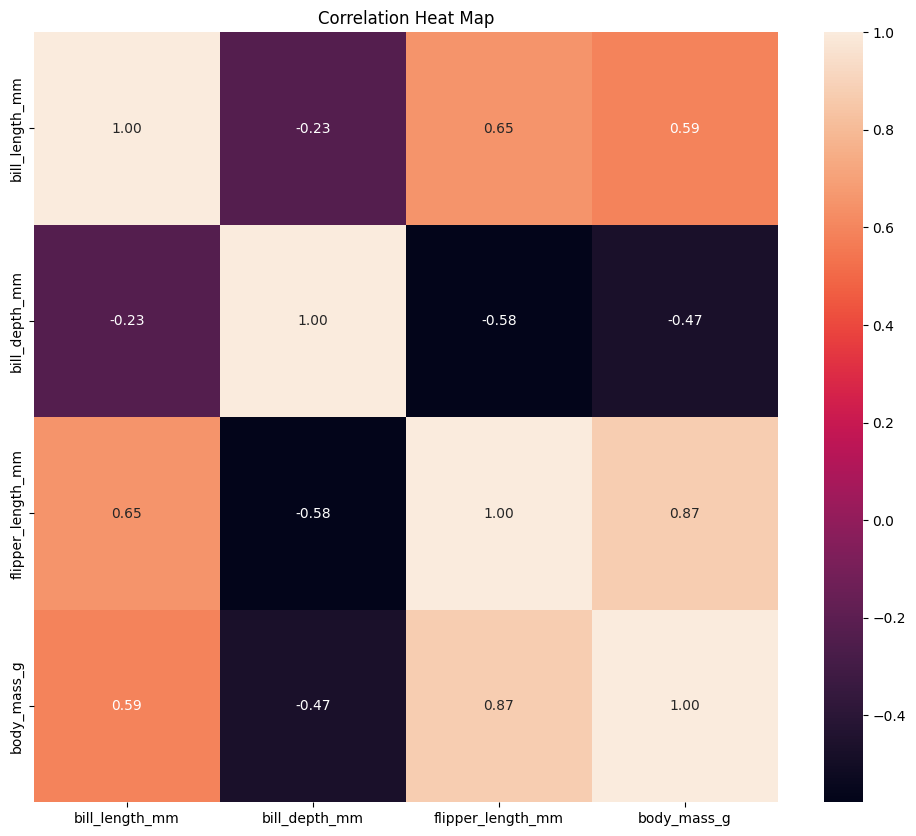

In [44]:
#heatmap
numeric_df = df_normalized_peng.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
matrix = numeric_df.corr()
print(matrix)

# Create the heatmap using seaborn
plt.figure(figsize=(12,10))
sn.heatmap(matrix, annot=True, fmt=".2f") # annot=True to print the values inside the squares, fmt for formatting
plt.title('Correlation Heat Map')
plt.show()

###Feature Seletion using mututal classifer

In [45]:
from sklearn.feature_selection import mutual_info_classif

In [63]:
# Define the features and target variable
X_m = data_encoded.drop(['species_Adelie', 'species_Gentoo','island_Torgersen','species_Chinstrap','island_Biscoe','sex_female','sex_male','island_Dream','year_2007','year_2008','year_2009'], axis=1)  # Features
y_m= data_encoded['species_Adelie']  # Target (assuming you're trying to predict Gentoo species)

# Calculate the mutual information
mutual_info = mutual_info_classif(X_m, y_m)

# Create a DataFrame for better visualization
mutual_info_df = pd.DataFrame(mutual_info, index=X_m.columns, columns=['Mutual Information'])

# Sort the DataFrame based on the mutual information
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Display the DataFrame
print(mutual_info_df)

                   Mutual Information
bill_length_mm               0.548432
flipper_length_mm            0.291323
bill_depth_mm                0.268317
body_mass_g                  0.191741


###Feature Selection using CHI-SQUARE Test

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Define the features and the target
X = df_normalized_peng[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]  # example features
y = df_normalized_peng['species']  # target variable

# Applying SelectKBest class to extract top k best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, y)

# Get scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(len(featureScores), 'Score'))  # print the best features


             Feature      Score
2  flipper_length_mm  29.563706
3        body_mass_g  26.761174
1      bill_depth_mm  25.502669
0     bill_length_mm  21.450381


###Regression or unsupervised learning

###Ridge regression

In [191]:
#finding the best value of alpha

X = data_encoded[['flipper_length_mm']]
y = data_encoded['bill_length_mm']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# List of alphas to try out
alphas = np.logspace(-6, 6, 13)  # Creates 13 alphas between 10^-6 and 10^6

# Initialize RidgeCV with specified alphas and cross-validation strategy
model = RidgeCV(alphas=alphas, store_cv_values=True)

model.fit(X_train, y_train)

# Get the best alpha
best_alpha = model.alpha_
print("Best alpha found:", best_alpha)


y_pred = model.predict(X_val)

# Calculate the MSE using the best alpha
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)


Best alpha found: 0.1
Mean Squared Error: 0.02660037466628761


<Figure size 1500x1000 with 0 Axes>

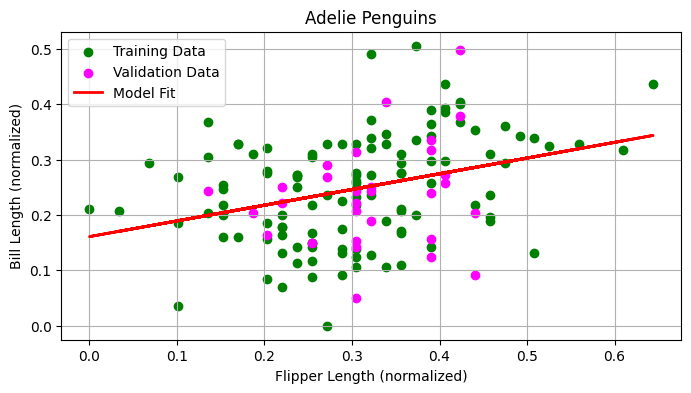

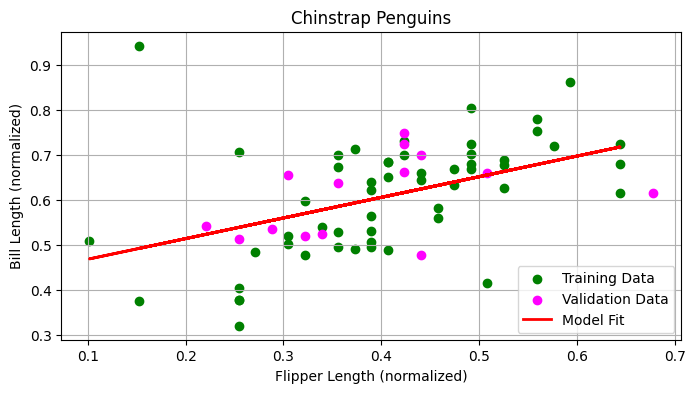

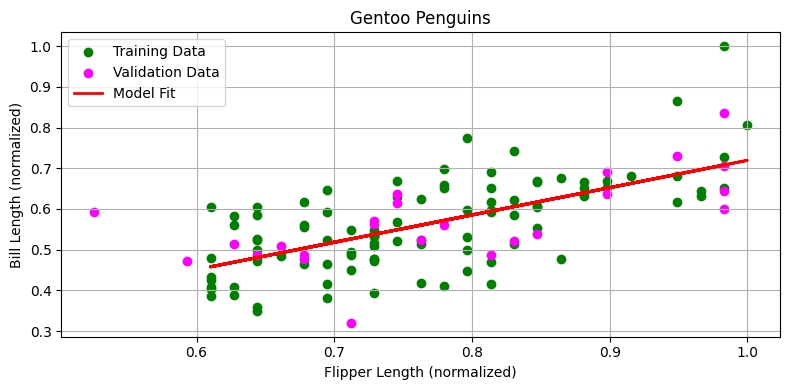

In [192]:
# Initialize the  Ridge regression model
model = Ridge(alpha=0.1) #since we got the best value of alpha

# Species list from one-hot encoded columns
species_columns = ['species_Adelie', 'species_Chinstrap', 'species_Gentoo']

# Dictionary to store results
results = {}
plt.figure(figsize=(15, 10))

# Loop through each species
for index, species_col in enumerate(species_columns):
    # Filter the dataset for the current species based on the one-hot column
    filtered_data = data_encoded[data_encoded[species_col] == 1]

    X = filtered_data[['flipper_length_mm']]
    y = filtered_data['bill_length_mm']

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the Ridge regression model on training data
    model.fit(X_train, y_train)

    # Predict using the model on both training and validation
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate the R² score and MSE for both training and validation
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    # Store the results in the dictionary
    results[species_col] = {
        'Training R² Score': train_r2,
        'Training MSE': train_mse,
        'Validation R² Score': val_r2,
        'Validation MSE': val_mse
    }

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.grid(True)
    plt.scatter(X_train, y_train, color='green', label='Training Data')
    plt.scatter(X_val, y_val, color='magenta', label='Validation Data')
    plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Model Fit')
    plt.title(f'{species_col.replace("species_", "")} Penguins')
    plt.xlabel('Flipper Length (normalized)')
    plt.ylabel('Bill Length (normalized)')
    plt.legend()

# Show plots
plt.tight_layout()
plt.show()




In [113]:
# Print model evaluation results
for species, stats in results.items():
    print(f"{species.replace('species_', '')} Penguins:")
    print(f"  Training R² Score: {stats['Training R² Score']:.3f}")
    print(f"  Training MSE: {stats['Training MSE']:.3f}")
    print(f"  Validation R² Score: {stats['Validation R² Score']:.3f}")
    print(f"  Validation MSE: {stats['Validation MSE']:.3f}\n")

Adelie Penguins:
  Training R² Score: 0.130
  Training MSE: 0.008
  Validation R² Score: 0.011
  Validation MSE: 0.008

Chinstrap Penguins:
  Training R² Score: 0.236
  Training MSE: 0.013
  Validation R² Score: 0.102
  Validation MSE: 0.006

Gentoo Penguins:
  Training R² Score: 0.451
  Training MSE: 0.007
  Validation R² Score: 0.390
  Validation MSE: 0.007



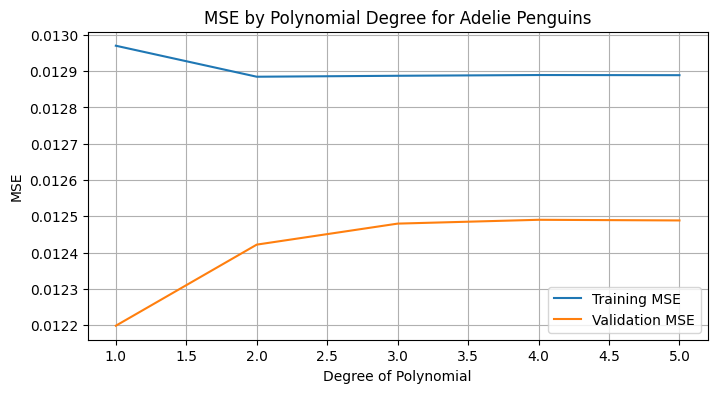

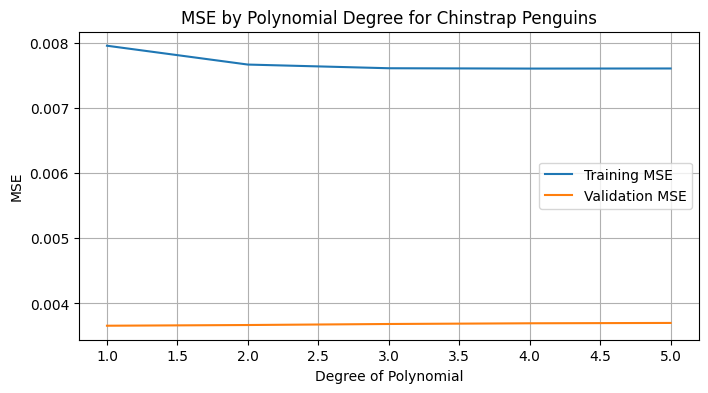

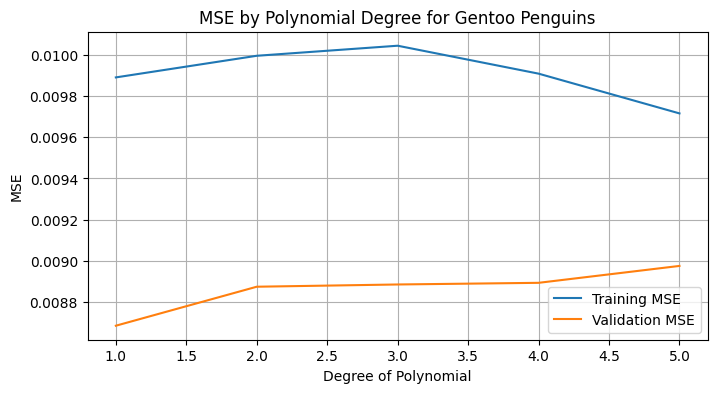

In [122]:
#mse comparision
from sklearn.preprocessing import PolynomialFeatures


# Assuming 'data_encoded' is your DataFrame
# Initialize the ridge regression model
model = Ridge(alpha=0.1)

# Species list from one-hot encoded columns
species_columns = ['species_Adelie', 'species_Chinstrap', 'species_Gentoo']

# Maximum degree of polynomial features
max_degree = 5

# Loop through each species
for species_col in species_columns:
    # Filter the dataset for the current species based on the one-hot column
    filtered_data = data_encoded[data_encoded[species_col] == 1]

    # Define predictor (X) and response (y) variables
    X = filtered_data[['flipper_length_mm']]  # Predictor
    y = filtered_data['body_mass_g']       # Response

    # Splitting the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    train_errors, val_errors = [], []

    # Compute MSE for polynomial degrees from 1 to max_degree
    for degree in range(1, max_degree + 1):
        # Create polynomial features
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit the linear regression model on training data
        model.fit(X_train_poly, y_train)

        # Predict using the model on both training and validation
        y_train_pred = model.predict(X_train_poly)
        y_val_pred = model.predict(X_val_poly)

        # Calculate the MSE for both training and validation
        train_mse = mean_squared_error(y_train, y_train_pred)
        val_mse = mean_squared_error(y_val, y_val_pred)

        train_errors.append(train_mse)
        val_errors.append(val_mse)

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_degree + 1), train_errors, label='Training MSE')
    plt.plot(range(1, max_degree + 1), val_errors, label='Validation MSE')
    plt.title(f'MSE by Polynomial Degree for {species_col.replace("species_", "")} Penguins')
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()


###k means clustering


In [209]:
# Select relevant features
features = ['bill_length_mm', 'body_mass_g']
X = data_encoded[features]

In [210]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

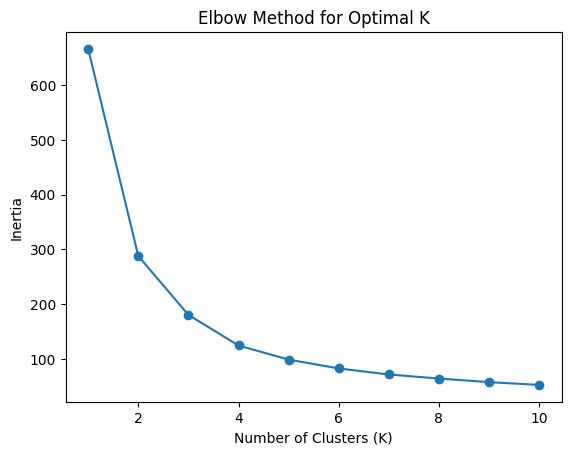

In [211]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [212]:
# Choosing K=3 based on the Elbow Method
kmeans_final = KMeans(n_clusters=3, random_state=42)
data_encoded['cluster'] = kmeans_final.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


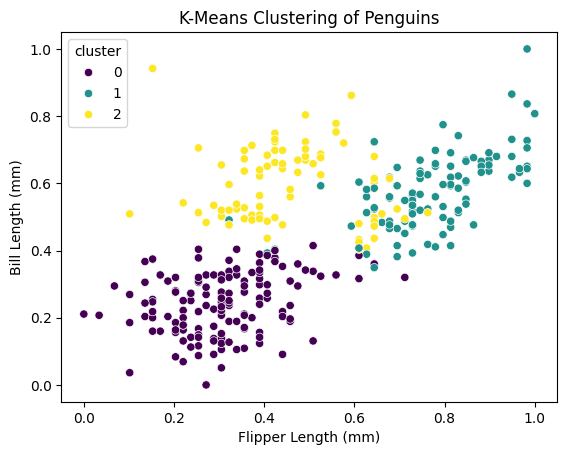

In [213]:
# Visualizing the clusters
sns.scatterplot(x='flipper_length_mm', y='bill_length_mm', hue='cluster', data=data_encoded, palette='viridis')
plt.title('K-Means Clustering of Penguins')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.show()

###Classification Algoritms

###Dummy Classifier

In [168]:
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
penguins = sns.load_dataset('penguins')
print(penguins.head())

# Preprocessing: Drop rows with missing values and extract relevant features
penguins = penguins.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'species'])

# Features and target
X = penguins[['bill_length_mm', 'flipper_length_mm']]
y = penguins['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Dummy Classifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Fit the model
dummy_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = dummy_clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
              precision    recall  f1-score   support

      Adelie       0.49      1.00      0.65        50
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.00      0.00      0.00        35

    accuracy                           0.49       103
   macro avg       0.16      0.33      0.22       103
weighted avg       0.24      0.49      0.32       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### k- nearest Neighbours

In [216]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
penguins = sns.load_dataset('penguins')

# Preprocessing: Drop rows with missing values and select relevant features
penguins = penguins.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'species'])

# Features and target
X = penguins[['bill_length_mm', 'flipper_length_mm']]
y = penguins['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 15, 25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_knn = grid_search.best_estimator_

# Predict on the testing set with the best estimator
y_pred = best_knn.predict(X_test_scaled)

# Evaluation metrics
accuracy_test = best_knn.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Best Hyperparameters:")
print(f"Number of Neighbors (k): {best_params['n_neighbors']}")
print(f"Type of Distance (p): {best_params['p']}")
print(f"Type of Weights: {best_params['weights']}")
print(f"\nCross-validation Score: {best_score:.5f}")

print("\nPerformance on Test Data:")
print(f"Score: {accuracy_test:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:\n", report)



Best Hyperparameters:
Number of Neighbors (k): 5
Type of Distance (p): 2
Type of Weights: uniform

Cross-validation Score: 0.96658

Performance on Test Data:
Score: 0.94
Confusion Matrix:
[[46  3  1]
 [ 2 16  0]
 [ 0  0 35]]

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.96      0.92      0.94        50
   Chinstrap       0.84      0.89      0.86        18
      Gentoo       0.97      1.00      0.99        35

    accuracy                           0.94       103
   macro avg       0.92      0.94      0.93       103
weighted avg       0.94      0.94      0.94       103



###Random Forest Classifer

In [170]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
penguins = sns.load_dataset('penguins')

# Preprocessing: Drop rows with missing values and select relevant features
penguins = penguins.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'species'])

# Features and target
X = penguins[['bill_length_mm', 'flipper_length_mm']]
y = penguins['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Adelie       1.00      0.90      0.95        50
   Chinstrap       0.82      1.00      0.90        18
      Gentoo       0.97      1.00      0.99        35

    accuracy                           0.95       103
   macro avg       0.93      0.97      0.94       103
weighted avg       0.96      0.95      0.95       103



In [228]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load dataset
penguins = sns.load_dataset('penguins')

# Preprocessing: Drop rows with missing values and select relevant features
penguins = penguins.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'species'])

# Features and target
X = penguins[['bill_length_mm', 'flipper_length_mm']]
y = penguins['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a Support Vector Machine classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Fit the model on the scaled training data
svm_clf.fit(X_train_scaled, y_train)

# Predict on the scaled testing set
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Adelie       0.96      0.92      0.94        50
   Chinstrap       0.84      0.89      0.86        18
      Gentoo       0.97      1.00      0.99        35

    accuracy                           0.94       103
   macro avg       0.92      0.94      0.93       103
weighted avg       0.94      0.94      0.94       103



###SUPPORT VECTOR MACHINES

In [184]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'species'])
penguins['species'] = penguins['species'].astype('category').cat.codes

# Features and target
X = penguins[['bill_length_mm', 'flipper_length_mm']].values
y = penguins['species'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVC (Support Vector Classifier)
svc = SVC()

# Setup GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Results from grid search
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

# Evaluate on test data
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test_scaled)
test_score = best_svc.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate F1-score, specify 'macro' or 'weighted' for multi-class cases
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Detailed classification report
detailed_report = classification_report(y_test, y_pred)

# Print results
print("Best Hyperparameters:")
print("Regularization Parameter (C):", best_params['C'])
print("Kernel Type:", best_params['kernel'])
print("Cross-validation Score:", best_score)
print("\nPerformance on Test Data:")
print("Accuracy:", accuracy)
print("F1-Score (Macro):", f1_macro)
print("F1-Score (Weighted):", f1_weighted)
print("\nClassification Report:\n", detailed_report)
print("Confusion Matrix:\n", conf_matrix)


Best Hyperparameters:
Regularization Parameter (C): 1
Kernel Type: rbf
Cross-validation Score: 0.9624113475177305

Performance on Test Data:
Accuracy: 0.941747572815534
F1-Score (Macro): 0.9298519560088977
F1-Score (Weighted): 0.9418775274882792

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.84      0.89      0.86        18
           2       0.97      1.00      0.99        35

    accuracy                           0.94       103
   macro avg       0.92      0.94      0.93       103
weighted avg       0.94      0.94      0.94       103

Confusion Matrix:
 [[46  3  1]
 [ 2 16  0]
 [ 0  0 35]]


<ipython-input-185-038acc57a7f2>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


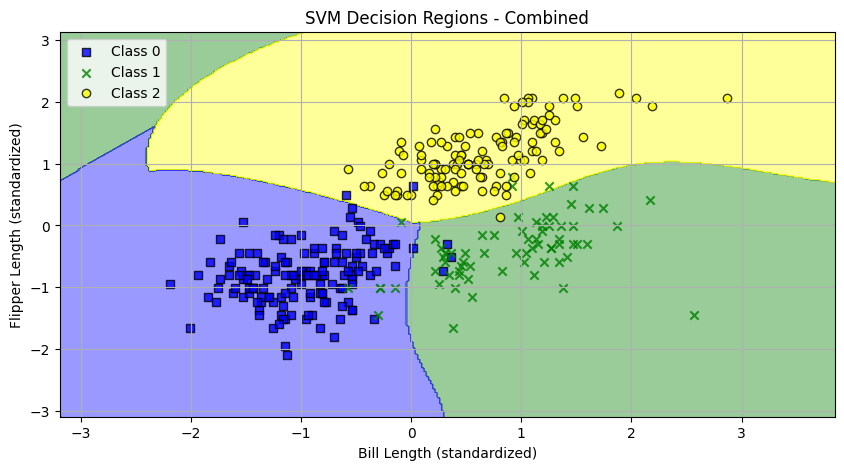

In [185]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_regions(X, y, classifier, test_indices=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'green', 'yellow', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Create a mesh to plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.grid(True)

    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}',
                    edgecolor='black')

    # # Highlight test samples
    # if test_indices is not None:
    #     X_test, y_test = X[test_indices, :], y[test_indices]
    #     plt.scatter(X_test[:, 0], X_test[:, 1], c='',
    #                 alpha=1.0, linewidth=1, marker='o',
    #                 s=100, label='Test set', edgecolor='black')

# Determine the range of indices for training and testing
train_indices = range(len(X_train_scaled))
test_indices = range(len(X_train_scaled), len(X_train_scaled) + len(X_test_scaled))

# Combined standardized dataset for plotting
X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions for training set
plt.figure(figsize=(10, 5))
plot_decision_regions(X_combined, y_combined, classifier=best_svc, test_indices=test_indices)
plt.title('SVM Decision Regions - Combined')
plt.xlabel('Bill Length (standardized)')
plt.ylabel('Flipper Length (standardized)')
plt.legend(loc='upper left')
plt.show()



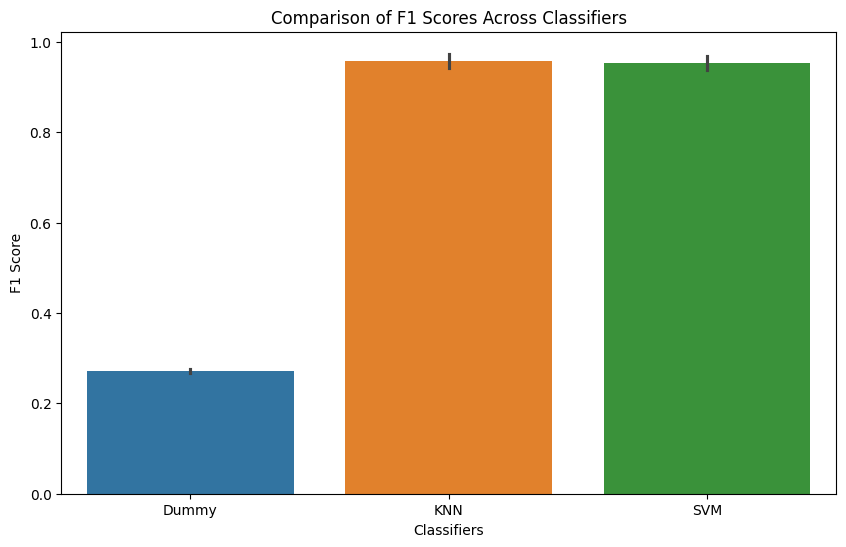

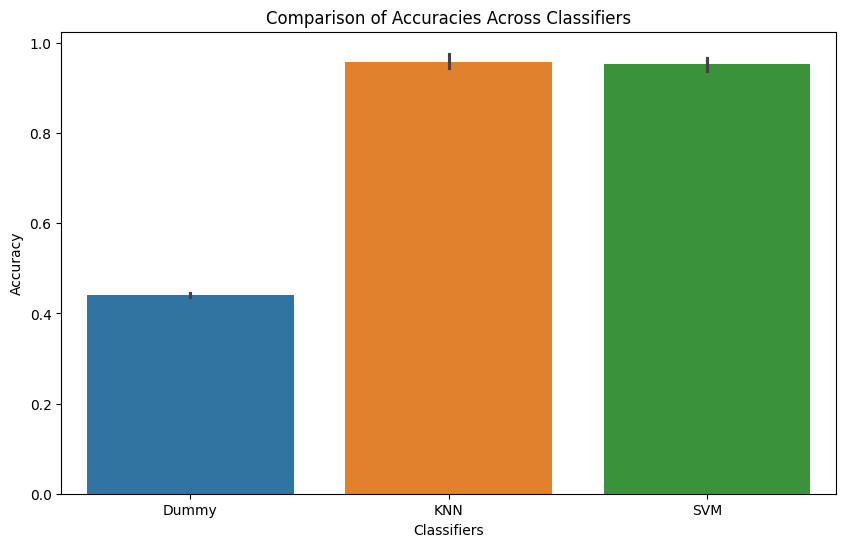

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import numpy as np

# Load dataset
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna(subset=['bill_length_mm', 'flipper_length_mm', 'species'])
penguins['species'] = penguins['species'].astype('category').cat.codes

# Features and target
X = penguins[['bill_length_mm', 'flipper_length_mm']].values
y = penguins['species'].values

# Dictionary to store results
results = {'Dummy': {'F1': [], 'Accuracy': []},
           'KNN': {'F1': [], 'Accuracy': []},
           'SVM': {'F1': [], 'Accuracy': []}}

# Number of iterations for cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits)

# Iterate over each split
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Classifiers
    classifiers = {
        'Dummy': DummyClassifier(strategy='most_frequent'),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'SVM': SVC(kernel='rbf', C=10)
    }

    # Evaluate classifiers
    for name, clf in classifiers.items():
        if name == 'Dummy':
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
        else:
            clf.fit(X_train_scaled, y_train)
            y_pred = clf.predict(X_test_scaled)

        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        results[name]['F1'].append(f1)
        results[name]['Accuracy'].append(accuracy)

# Prepare DataFrame for plotting
data_f1 = pd.DataFrame({k: v['F1'] for k, v in results.items()})
data_accuracy = pd.DataFrame({k: v['Accuracy'] for k, v in results.items()})

# Plotting F1 Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=data_f1)
plt.title('Comparison of F1 Scores Across Classifiers')
plt.ylabel('F1 Score')
plt.xlabel('Classifiers')

# Plotting Accuracies
plt.figure(figsize=(10, 6))
sns.barplot(data=data_accuracy)
plt.title('Comparison of Accuracies Across Classifiers')
plt.ylabel('Accuracy')
plt.xlabel('Classifiers')

plt.show()
